# 에이에프아이(뒤끝) DS 프로젝트


##프로젝트 아이디어

In [ ]:
진행 순서

1. 데이터 저장 (0)
2. EDA 및 데이터 전처리  
 2-1. 데이터 시각화(kibana)(EDA)
 - 시간 그래프
 - 상관계수(inDate, 일별,주별,월별count)
 - 자기상관 그래프
 - 산점도 행렬 그래프

 2-2. url 분석, inDate 분석(1일차) (0)

 2-3. 가설 다시 생각해보기(수립)
 2-4. 데이터 전처리
 2-5. Data Featuring(게임별, 유저별 클러스터링, 접속 빈도, 평균 접속 주기, 총 접속수(전체 데이터), 직전 접속일 수(미래 - 과거 접속일 차이 넣기),요일) ,, 기준일에 범주에 따라 접속일/총접속일 정보어떤가 #다시 한번 생각해보기 (2일차)
 2-6. 라벨링 (기준일 정하기) - 불균형 데이터 결정 2개 이상해보기
 2-7. imbalance 데이터 어떻게 할지? 그대로 진행? 아니면 다른 기법 사용 
 2-8. 임베딩 모델 정하기 ( 베이스 모델, 여러가지 ) #병렬화 timecost 생각해서 정리
 2-9. 추가 벡터 생각해보기 #01/10일까지 알아봐야함 (임베딩 전에 특성을 넣을 것인지, 임베딩 후에 추가벡터로 사용할 것인지)
 2-10. 평가지표 정하기 (precision 우선, recall, f1, roc,auc ...) (3,4일차)

3. 딥러닝 학습
 3-1. 딥러닝 확인하기
 3-2. 하이퍼 파라미터 조정 (optimizer, )
 3-3. 결과 확인

4. 발표자료
 4-1. PPT 만들기 -> 근거 타당성
 4-2. 

game_id 기준으로 클러스터링
gamer_id 기준으로도 클러스터링
샘플데이터 받으면 url 분석 => 전처리 범위 정의
inDate
  - 기준일
  - 다른 특성으로 가공 생각

<생각해보기>
임베딩 + 추가벡터 방식
kibana 시각화

In [ ]:
1. 가설 세우기

가설1. 게임 별(혹은 게임 장르별) 로그인 분포 (추세, 주기, 계절성)가 다를 것이다.
가설2. 설정한 주기 내에 개인의 로그인 분포 빈도에 따라 이탈예측이 달라질 것이다.
가설3. 게임 별 랜덤 유저(유저 클러스터링)의 행동을 파악하여 설정하면 정확도가 높아질 것이다.(게임 유저의 진입-집중-몰입-이탈단계)
https://www.youtube.com/watch?v=kcE_1n41xdk 넥슨
https://www.youtube.com/watch?v=idsJmEP9cpQ 네이버 클라우드

유저 클러스터링, 데이터 url을 나눠보기 (논문에 기반)
행동 유형 ( url안에서 데이터를 뽑아서 해결해보기 )


In [ ]:
2. url + method 분석



In [ ]:
3. 뒤끝, 게임 서버 정보

뒤끝 사이트 https://www.thebackend.io/

뒤끝 베이스 : 서버 연동, 로그인, 게임정보 관리

- 게임 유저 관리 : 로그인 , 유저정보관리
- 게임 운영 관리 : 이벤트 관련, 1:1 문의
- 결제 관리
- 랭킹 관리 : 유저 랭킹, 길드 랭킹, 랭킹 보상
- 소셜 기능 : 친구, 쪽지, 길드
- 푸시 알람
- 게임 정보 관리
- 차트,확률,쿠폰 관리


게임 서버 로그

elasticsearch(오픈소스 DB엔진) + kibana(분석)

EDA를 kibana로 하는 것이 효율적일듯..(AWS 발표 유튜브 링크 찾기)


- 게임 유저의 행동패턴 : 유입-app설치-계정생성-튜토리얼-미션,컨텐츠,결제,pvp,pve,소셜활동,게임자원의 변화 - 접속종료 - 장기미접속(이탈)

- 이탈?
: 연속 미접속 기간- 짧으면 오탐지 가능, 길면 이탈자 미탐지
예시 ) 주차별 접속 빈도를 이탈율로 추정

- 유입 시에 유저들의 이탈이 많다.

유저 이탈 3단계(설정하기 나름)
초반 (게임플레이 1일차) - 중반(한달) - 후반(콘텐츠 구성 후반부)

여러가지 이탈 변수
- 디바이스 환경 이탈: 기기 성능이 못따라줘서 이탈(처음 로그인하고 접속종료와 시작을 계속 하는 경우?)
- 첫인상 이탈 현상 : 일러스트, 영상, 광고, ui, 튜토리얼, 초반 레벨 등등

ML / DL 어떤 걸 할지 생각해보기
DL은 예측력이 좋으나 해석력이 떨어짐

딥러닝 모델? 뭘로 할까?
-RNN 기반, LSTM, AutoEncoder, Transformer, 

기준일 관련하여서 imbalance가 의심되지만
짧게 잡으면 imbalance가 아닐 수도 있기 때문에 짧게 잡고 한번, 길게 한번 해보면 좋을 것 같다.

성능평가
Precision(확실히 이탈 예측 가능한 유저 집중), Recall(최대한 많은 유저를 잠재 이탈자로 간주), F1 , AUC-ROC 등등

고려사항
주차 별로 달라지는 정확도?

(추가)
일별 방문자 (DAU)
신규 가입자 (NRU)
잔존률 (Retention)

유저 클러스터링 아이디어 : 유저별 페르소나 

In [ ]:
# 태연님
# 데이터 활용 
(가설1) 로그수가 일정 수준 이하인 경우는 이탈 예측에 부정적인 영향을 줄 것이다.
       : 로그수가 적은 데이터를 활용할 경우 노이즈가 생길 수 있다는 전제하 
       : 로그수의 기준을 정하고, 해당 기준에 미치지 못하는 유저 데이터는 배제 

(가설2) 정보의 중요도는 로그수에 비례할 것이다.
       : 유저별로 로그수에 따른 가중치를 적용
       : 로그수가 많은 유저의 정보에는 높은 가중치를 적용

(가설3) 신규접속로그 수는 이탈에 영향을 미칠것이다.
       (예) 일정 기준시간 내 여러번 접속한 유저의 경우, 이탈률이 작을 것이다.

       1) [기준일-N일]구간 내 신규접속로그 수를 반영해보는 것은 어떨까? #[기준일-N일] = N구간
       2) [24시간] 내 신규접속로그 수를 반영해볼까? 

(가설4) 게임 장르에 따라 접속 주기의 대소는 달라질 것이다.
       : 게임 장르를 나타내는 벡터로 원 핫 벡터 접합 가능할 듯

(가설5) 가중치 적용



# 기타
임베딩이 아닌 다른 방법으로 머신러닝 분류모델 사용도 가능할 듯

X
- 총접속로그수 : 
- 평균접속주기 : 
- 게임장르 : 
...

y
이탈여부 : 0 or 1


# 기준일 설정
0) inDate : 더 정확한 이탈기준을 세우기 위해 기준일을 '일'단위가 아닌 '시간'단위로 보는 것은 어떨까?? 
            (예) 24시간 단위로 접속주기 확인 => 24h * 10 = 240h
            ==> '일'단위로 접속주기 파악 시, 기준일에 따라 이탈여부가 달라질 수 있음

1) 전체 유저의 평균 접속 주기 확인 : (접속_k - 접속_k-1).days
       : game_id에 따른 평균접속주기 차이 있을 것 > game_id를 평균접속주기에 따라 카레고라이징 (굳이 따지자면 장르 구분과 비슷한 맥락)
           => 신규 특성 생성
       : 
    - 평균 접속 주기에 비해 기준일을 타이트하게 잡는 경우
    - 평균 접속 주기에 비해 기준일을 루즈하게 잡는 경우

In [ ]:
# 기준일 설정
1) 뒷구간 : min 3일 --> 모바일 게임 주말 패턴 확인-->3일 이상
평일: 91320.63636363637
주말: 54542.0

2) 요일별 평균 접속 수 : 비슷함
월: 92665.5
화: 83704.0
수: 92545.5
목: 95482.0
금: 96014.5
토: 109084.0
일: 98631.5

3) 첫구간에 접속 로그가 없으면 라벨링 하지 않고 제외

4) 첫구간 max 5일

n 설정 근거
https://boxnwhis.kr/2014/09/15/make_a_criterion_for_churn.html

In [ ]:
# url
1. version이 들어가지 않은 url도 있음
   (예) '/data/isAliveToken' / '/data/rank' ==> 둘다 method == GET

2. /data/**
   1) /data/gameinfo/ : PUT 데이터가 유저의 행동일 것으로 추정
   2) /data/gameLog/ : POST
   3) /data/rank
        /data/rank/union : GET, POST
        /data/rank/realtime : '/data/rank/realtime/v1/fa1a9630-dadf-11ea-b6c9-87a46f2f5a7c/gamer?gap=5' : GET
        /data/rank/v : '/data/rank/v2.1/45d3bb50-2565-11ea-bb6b-a7f2a1032cad?limit=100&offset=2482' : GET
        /data/rank : '/data/rank' : GET

   4) /data/probability/ : GET
   5) /data/isAliveToken : GET
   7) /data/social
        /data/social/message
        /data/social/guild 
            - '/data/social/guild/v3/myGuild' : GET
            - '/data/social/guild/v2/myGuild' : GET
            - '/data/social/guild/v3/guildInDate' : GET
            - '/data/social/guild/v3/applicant' : GET
            - '/data/social/guild/v3.3/2021-12-31T06:26:09.362Z/member' : GET
            - '/data/social/guild/v2/2021-03-08T10:20:48.595Z' : GET
            - '/data/social/guild/v1/2021-01-22T09:54:15.634Z/member' : GET
            - '/data/social/guild/v3.1/myGuildGoods' : GET
            - '/data/social/guild/v3.1/guildGoods/2022-01-05T02:36:59.858Z' : GET
            - '/data/social/guild/v3.1/goods': POST
            - '/data/social/guild/v1.3' : PUT
            - '/data/social/guild/random/v1?limit=10' : GET
        /data/social/friend : GET
'

   8) /data/chart/ : GET
   9) /data/post/
        /data/post/v3/admin : PUT
        /data/post/v3?limitForAdminPost=10&limitForUserPost=10 : GET

   10) /data/gamer/ : GET, POST
        /data/gamer/v3/nickname : POST
        /data/gamer/v2.1/country : POST
        /data/gamer/v1.3/nickname?nickname= : GET

   11) /data/coupon/ : PUT
   12) /data/gameInfo/ 다시확인
   13) /data/notice/ : GET
   14) /data/chat/ : GET
   15) /data/event/ : GET
   16) /data/push : POST
        /data/push/gamer : DELETE

카테고리 분포 확인 후 불필요하다고 생각되는 것 : push, gameLog, dbschema, matchmake, billing, authorization

In [ ]:
분석

-시간당 game_info 개수를 카운트해서 feature 설정, 중복값은 삭제하는 방법
-get에 해당하는 rank, chat,probability,social와 같은 특성은 그대로 유지 -- 근거가 있으니까 유지
-method: PUT,GET만 사용 -- post,delete는 필요하지 않음

## 1. 데이터 확인하기(EDA)

In [ ]:
import pandas as pd

url = 'http://ec2-13-125-225-205.ap-northeast-2.compute.amazonaws.com/codestates/recent-data'
df = pd.read_json(url)
df


In [ ]:
!pip install -U pandas-profiling

In [ ]:
import pandas_profiling

#profile 파일 만들기
profile = df.profile_report()
profile

In [ ]:
#데이터프레임에서 tableAndColumn 제거 ( 포함할 경우, unhashable 에러 발생(list안에 list가 있으면 유니크 값을 뽑을 수 없게 된다.) )
df= df.drop("tableAndColumn",axis=1)

In [ ]:
#중복값 확인하기
df.nunique()

game_id       55
gamer_id    2411
inDate      7531
url          975
method         4
dtype: int64

In [ ]:
df['method'].unique()

array(['POST', 'PUT', 'GET', 'DELETE'], dtype=object)

In [ ]:
# indate 시간 형식으로 변환
df['inDate']=df['inDate'].apply(lambda x : x[11:19])

In [ ]:
df['inDate'] = pd.to_datetime(df['inDate'])

In [ ]:
df

game_id  ... method
0        1585  ...   POST
1         380  ...    PUT
2        2326  ...    PUT
3        2326  ...    PUT
4        2326  ...    PUT
...       ...  ...    ...
9995     2319  ...   POST
9996     1585  ...    GET
9997     2319  ...    PUT
9998     2326  ...    GET
9999      953  ...   POST

[10000 rows x 5 columns]

Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.


In [ ]:
df['url'].unique()

In [ ]:
#유저별 데이터 확인해보기
df[df['gamer_id']=='ec7af73f8cc885ca9bae7c62625f889a821f85aedcc33cbcb79df4addf486a3e']

game_id  ... method
14       2319  ...    PUT
404      2319  ...   POST
2849     2319  ...    PUT
8223     2319  ...   POST
9953     2319  ...    PUT

[5 rows x 5 columns]

In [ ]:
#유저별 데이터 확인해보기
df[df['gamer_id']=='cc6d21327fe955420ffa6e77f9a521e858af967e6f30bc481c312ace48baaa88']

game_id  ... method
21       2319  ...   POST
8019     2319  ...   POST
8092     2319  ...    PUT
8141     2319  ...    PUT
8197     2319  ...    PUT
8229     2319  ...    PUT
8350     2319  ...    PUT

[7 rows x 5 columns]

In [ ]:
df.loc[df['url'].str.contains('union')]

game_id  ... method
0        1585  ...   POST
1        1585  ...   POST
2        1916  ...    PUT
3        2273  ...   POST
4        2319  ...   POST
...       ...  ...    ...
9995     2319  ...   POST
9996     2326  ...    PUT
9997     1572  ...    GET
9998     2319  ...   POST
9999     2326  ...    PUT

[7783 rows x 5 columns]

## 2. 데이터 시각화 해보기

UFuncTypeError: ignored

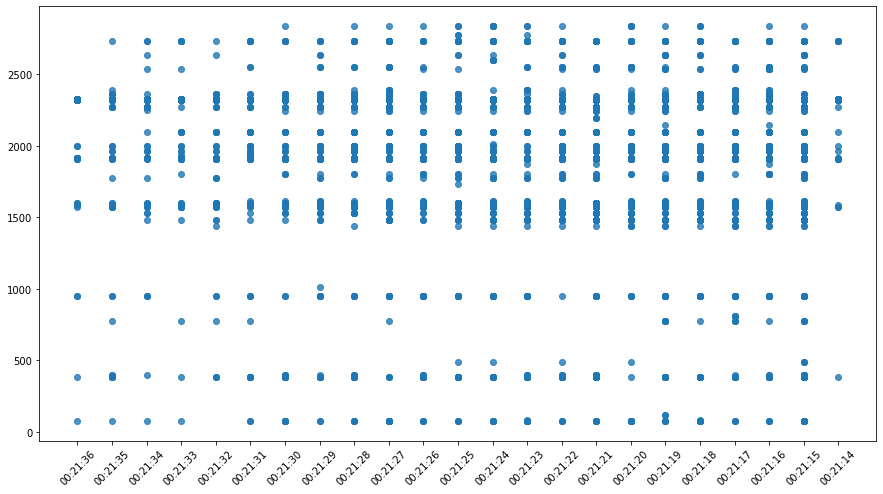

In [ ]:
# 시간에 따른 분포수 확인
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize = (15,8))
plt.xticks(rotation=45)
sns.regplot(x=df["inDate"], y=df["game_id"])

In [ ]:
#게임 별 로그 개수
df['game_id'].value_counts()

2326    2404
2319    2158
1585     641
1916     551
1913     539
1908     521
2097     451
1600     385
2734     274
1572     260
380      205
1999     183
1482     181
953      171
2273     169
1966     168
72       118
2364     114
1529      87
2553      49
1773      43
1802      40
394       37
1615      30
2837      25
2634      24
2393      23
2536      23
2243      22
1442      20
772       19
1905      15
2347       8
490        7
2599       6
1933       4
808        4
2195       3
1875       3
2774       3
120        2
1484       2
85         2
2147       2
2013       1
1736       1
1010       1
2253       1
Name: game_id, dtype: int64

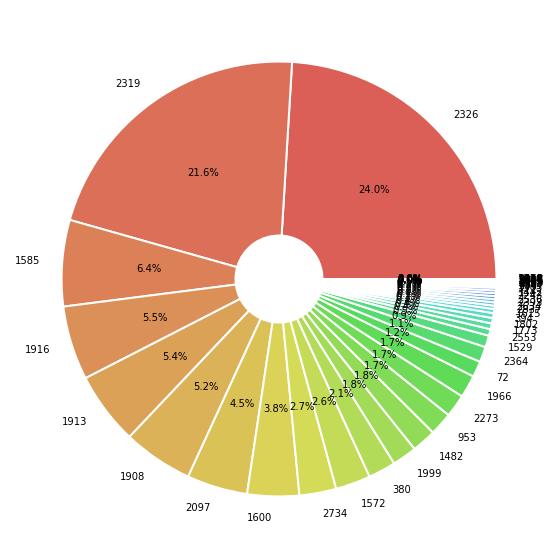

In [ ]:
# 게임 별 분포 확인
import matplotlib.pyplot as plt
labels = df['game_id'].value_counts().index
colors = sns.color_palette('hls',len(labels))
wedgeprops={'width': 0.8, 'edgecolor': 'w', 'linewidth': 2}
plt.pie(df['game_id'].value_counts(), labels=labels, autopct='%.1f%%', colors=colors, wedgeprops=wedgeprops)
plt.rcParams["figure.figsize"] = (10, 10)

In [ ]:
# 게임 별 시간당 로그 수
df_new = pd.DataFrame(data=None, index= df_set['inDate'].unique(), columns=df_set['game_id'].unique())

for i in df_set['game_id'].unique():
  df_new[i]=df_set['game_id'==i]


2319 2326 1999 1913 1600 1908  ... 85   1875 2195 120  2147 808 
2022-01-05 00:21:36  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN  NaN  NaN  NaN  NaN
2022-01-05 00:21:35  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN  NaN  NaN  NaN  NaN
2022-01-05 00:21:34  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN  NaN  NaN  NaN  NaN
2022-01-05 00:21:33  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN  NaN  NaN  NaN  NaN
2022-01-05 00:21:32  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN  NaN  NaN  NaN  NaN
2022-01-05 00:21:31  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN  NaN  NaN  NaN  NaN
2022-01-05 00:21:30  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN  NaN  NaN  NaN  NaN
2022-01-05 00:21:29  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN  NaN  NaN  NaN  NaN
2022-01-05 00:21:28  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN  NaN  NaN  NaN  NaN
2022-01-05 00:21:27  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN  NaN  NaN  NaN  NaN
2022-01-05 00:21:26  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN  NaN  NaN  NaN  NaN
2022-01-05 00:21:25  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN  NaN  NaN  NaN  NaN
2022-01-05 00:21:24  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN  NaN  NaN  NaN  NaN
2022-01-05 00:21:23  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN  NaN  NaN  NaN  NaN
2022-01-05 00:21:22  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN  NaN  NaN  NaN  NaN
2022-01-05 00:21:21  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN  NaN  NaN  NaN  NaN
2022-01-05 00:21:20  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN  NaN  NaN  NaN  NaN
2022-01-05 00:21:19  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN  NaN  NaN  NaN  NaN
2022-01-05 00:21:18  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN  NaN  NaN  NaN  NaN
2022-01-05 00:21:17  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN  NaN  NaN  NaN  NaN
2022-01-05 00:21:16  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN  NaN  NaN  NaN  NaN
2022-01-05 00:21:15  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN  NaN  NaN  NaN  NaN
2022-01-05 00:21:14  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN  NaN  NaN  NaN  NaN

[23 rows x 48 columns]

In [ ]:
df_set = df.groupby(by=['inDate','game_id'], as_index=False).count()
df_set= df_set[['inDate','game_id','gamer_id']]
df_set.head(10)

inDate  game_id  gamer_id
0 2022-01-05 00:21:14      380         1
1 2022-01-05 00:21:14     1572         2
2 2022-01-05 00:21:14     1585         1
3 2022-01-05 00:21:14     1905         1
4 2022-01-05 00:21:14     1908         3
5 2022-01-05 00:21:14     1916         2
6 2022-01-05 00:21:14     1966         1
7 2022-01-05 00:21:14     1999         1
8 2022-01-05 00:21:14     2097         1
9 2022-01-05 00:21:14     2273         1

In [ ]:
df_set['inDate'].unique()

array(['00:21:14', '00:21:15', '00:21:16', '00:21:17', '00:21:18',
       '00:21:19', '00:21:20', '00:21:21', '00:21:22', '00:21:23',
       '00:21:24', '00:21:25', '00:21:26', '00:21:27', '00:21:28',
       '00:21:29', '00:21:30', '00:21:31', '00:21:32', '00:21:33',
       '00:21:34', '00:21:35', '00:21:36'], dtype=object)

In [ ]:
df_set['inDate'] = pd.to_datetime(df_set['inDate'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  This is separate from the ipykernel package so we can avoid doing imports until


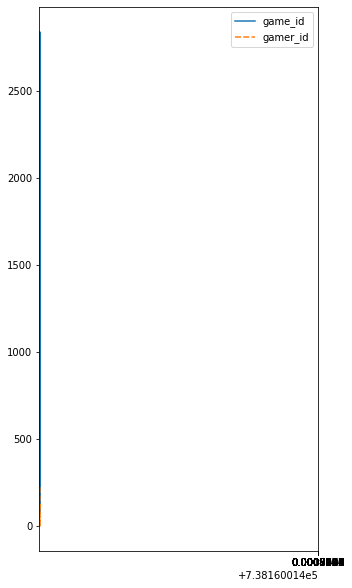

In [ ]:
sns.lineplot(data=df_set)
values = df_set['inDate'].unique()
ax = plt.subplot()
ax.set_xticks(values)
plt.rcParams["figure.figsize"] = (5,10)

###(1) 2326 게임의 로그 밀도

In [ ]:
# 가장 많은 개수의 게임만 분포 확인
df2326=df[df['game_id']==2326]

In [ ]:
df2326['inDate'] = pd.to_datetime(df2326['inDate'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df2326.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2404 entries, 2 to 9999
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   game_id   2404 non-null   int64         
 1   gamer_id  2404 non-null   object        
 2   inDate    2404 non-null   datetime64[ns]
 3   url       2404 non-null   object        
 4   method    2404 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 112.7+ KB


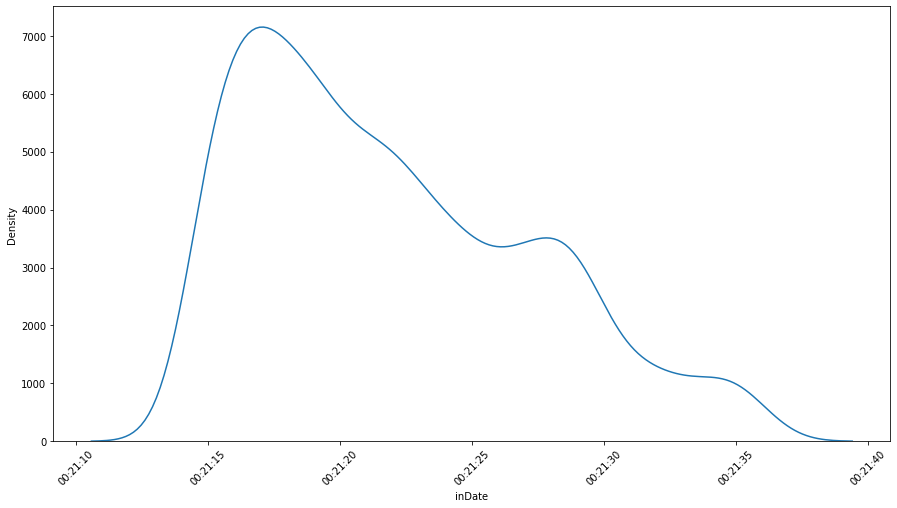

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize = (15,8))
plt.xticks(rotation=45)
sns.kdeplot(df2326['inDate'])

###(2) 2319 게임의 로그 밀도

In [ ]:
# 두번째로 가장 많은 개수의 게임만 분포 확인
df2319=df[df['game_id']==2319]

In [ ]:
df2319['inDate'] = pd.to_datetime(df2319['inDate'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


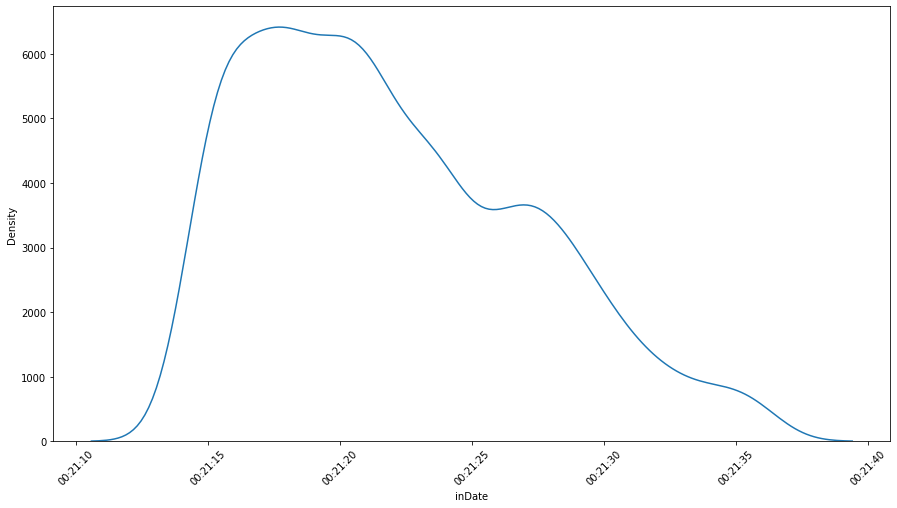

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize = (15,8))
plt.xticks(rotation=45)
sns.kdeplot(df2319['inDate'])

###(3) 953 게임의 로그 밀도

In [ ]:
# 랜덤으로 정한 게임의 분포 확인
df953=df[df['game_id']==953]

In [ ]:
df953['inDate'] = pd.to_datetime(df953['inDate'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


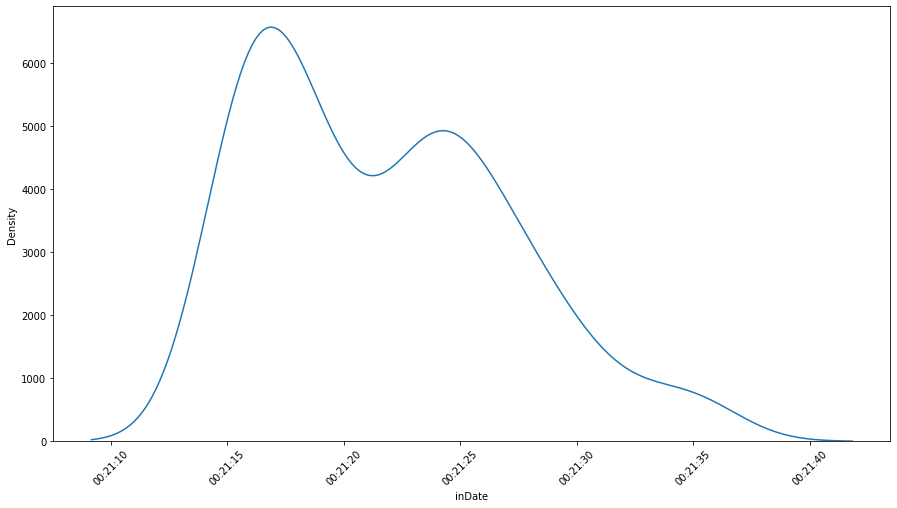

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize = (15,8))
plt.xticks(rotation=45)
sns.kdeplot(df953['inDate'])